In [23]:
import os
path = os.path.join('/home/santiago/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)
from reservoirpy.pvtpy import black_oil as bl
from reservoirpy.wellproductivitypy import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
ubh = pi.ubh(
    brand='brand', 
    surf_to_pump_depth=4500,
    pump_to_perf_depth=5820,
    injection_di=1.6,
    return_di=2.3087,
    prod_di=1.99,
    nozzle=4.02, 
    throat=6.09,
    power_fluid_ge=1
)

In [25]:
issubclass(type(ubh),pi.als)

True

In [26]:
ubh.annulus_area()

0.025476745526896858

In [27]:
ubh.get_area('nozzle')

0.01967317948999957

In [28]:
ubh.get_area('throat')

0.04514992501689643

In [29]:
ubh.pump_to_perf_depth

array([4500.        , 4594.28571429, 4688.57142857, 4782.85714286,
       4877.14285714, 4971.42857143, 5065.71428571, 5160.        ,
       5254.28571429, 5348.57142857, 5442.85714286, 5537.14285714,
       5631.42857143, 5725.71428571, 5820.        ])

In [30]:
ubh.injection_di

array([1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,
       1.6, 1.6])

In [31]:
ubh.fad()

0.43573005896770123

# Example

## Fluids Properties (Oil, Gas, Water)

In [32]:
oil = bl.oil(
    formation = 'fm',
    pb = 2174,
    api = 24.4,
    rsb = 287,
    sg_gas = 0.6,
    temp = 122
)

#Read the csv file
oil_pvt_df = pd.read_csv('pvt.csv', index_col='pressure')

#Interpolate for the missing values of muo
oil_pvt_df['muo'] = oil_pvt_df['muo'].interpolate(method='linear')
oil_pvt_df['tension'] = 30

#Create oil pvt object
oil_pvt = bl.pvt(oil_pvt_df)

oil.pvt = oil_pvt

print(oil.pvt)

             bo     rs     muo        co   rhoo  tension
pressure                                                
2570.0    1.126  287.0   5.796  0.000007  0.839       30
2500.0    1.127  287.0   5.750  0.000007  0.838       30
2400.0    1.128  287.0   5.697  0.000007  0.838       30
2300.0    1.128  287.0   5.644  0.000008  0.837       30
2200.0    1.129  287.0   5.591  0.000012  0.836       30
2174.0    1.133  287.0   5.538       NaN  0.836       30
1850.0    1.121  242.0   6.888       NaN  0.841       30
1550.0    1.107  205.0   8.095       NaN  0.846       30
1250.0    1.094  167.0   9.306       NaN  0.852       30
950.0     1.081  128.0  10.595       NaN  0.858       30
650.0     1.067   88.0  12.093       NaN  0.864       30
350.0     1.052   45.0  14.088       NaN  0.871       30
150.0     1.041   19.0  16.102       NaN  0.876       30
80.0      1.038    8.0  17.131       NaN  0.877       30
0.0       1.027    0.0  19.135       NaN  0.884       30


In [33]:
composition_dict = {
    'mole_fraction':[0.0194,0.004,0.9598,0.0023,0.0057,0.0062,0.0006,0.0003,0.0001,0.0005,0.001,0.0001],
    'compound':['carbon-dioxide','nitrogen','methane','ethane','propane','isobutane','n-butane','isopentane','n-pentane','n-hexane','n-heptane','n-octane']
     }


composition=bl.chromatography(composition_dict,normalize=True)
print(composition)

fm = 'fm'
t= 122
gas = bl.gas(formation=fm, temp=t, chromatography=composition)
gas.pvt_from_correlations(end_pressure=2570)
print(gas.pvt)
print(gas.correlations)

                mole_fraction formula        mw     ppc     tpc
compound                                                       
carbon-dioxide         0.0194     CO2   44.0100  1071.0   87.91
nitrogen               0.0040      N2   28.0134   493.1 -232.51
methane                0.9598     CH4   16.0430   666.4 -116.67
ethane                 0.0023    C2H6   30.0700   706.5   89.92
propane                0.0057    C3H8   44.0970   616.0  206.06
isobutane              0.0062   C4H10   58.1230   527.9  274.46
n-butane               0.0006   C4H10   58.1230   550.6  305.62
isopentane             0.0003   C5H12   72.1500   490.4  369.10
n-pentane              0.0001   C5H12   73.1500   488.6  385.80
n-hexane               0.0005   C6H14   86.1770   436.9  453.60
n-heptane              0.0010   C7H16  100.2040   396.8  512.70
n-octane               0.0001   C8H18  114.2310   360.7  564.22
                    z      rhog        bg       mug        cg
pressure                                  

In [34]:
water = bl.water(
    formation='fm',
    pb=2174,
    salinity=200, 
    temp=122
)
water.pvt_from_correlations(end_pressure=2570)
water.pvt['tension'] = 30
print(water.pvt)

                   rsw        cw        bw       muw       rhow  tension
pressure                                                                
20.000000     3.245692  0.000003  1.014461  0.602674  61.519059       30
154.210526    3.915812  0.000003  1.014374  0.602674  61.524338       30
288.421053    4.578329  0.000003  1.014278  0.602674  61.530164       30
422.631579    5.233244  0.000003  1.014173  0.602674  61.536537       30
556.842105    5.880557  0.000003  1.014059  0.602674  61.543458       30
691.052632    6.520268  0.000003  1.013936  0.602674  61.550928       30
825.263158    7.152377  0.000003  1.013803  0.602674  61.558946       30
959.473684    7.776883  0.000003  1.013662  0.602674  61.567514       30
1093.684211   8.393787  0.000003  1.013512  0.602674  61.576631       30
1227.894737   9.003088  0.000003  1.013353  0.602674  61.586298       30
1362.105263   9.604787  0.000003  1.013185  0.602674  61.596515       30
1496.315789  10.198884  0.000003  1.013008  0.60267

## Inflow curve

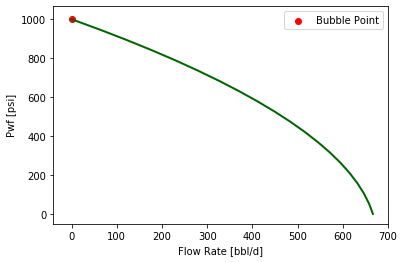

In [46]:
well_pi = pi.oil_inflow(
        pr = 1000,
        j = 1.2,
        pb = 1000,
)

well_pi.plot()

In [48]:
df, qs = ubh.flow_match(
        injection_pressure=3450,
        injection_rate = 1659,
        mu_inj = 1,
        return_pressure = 27,
        liquid_rate_guess = 256,
        bsw = 0.82,
        gas_rate = 73,
        gor = None,
        glr = None,
        inflow = well_pi,
        oil_obj=oil,
        gas_obj=gas,
        water_obj=water, 
        epsilon = 0.0006,
        surface_temperature=80, 
        temperature_gradient=1, 
        max_iter = 20,
        max_iter_profile = 20,
        max_iter_qn = 20,
        tol = 0.03,
        tol_profile = 0.05,
        tol_qn = 0.15,
        method_profile = 'hagedorn_brown'
    )

print(qs)
print(df)

422.53964837594845
           qs         qo    qg          gor         glr           qn  \
0  256.000000  46.080000  73.0  1584.201389  285.156250  1684.167116   
1  459.429577  82.697324  73.0   882.737151  158.892687  1723.247126   
2  385.827500  69.448950  73.0  1051.131802  189.203724  1707.488195   
3  434.924097  78.286337  73.0   932.474329  167.845379  1717.968462   
4  411.677238  74.101903  73.0   985.129898  177.323382  1712.940892   
5  422.539648  76.057137  73.0   959.804736  172.764852     0.000000   

          pwf           pn         pps           qd  ...       mur  \
0  760.966862  5115.167566  530.978700  1940.167116  ...  1.026763   
1  510.301619  5074.998908  275.595442  2182.676702  ...  1.279202   
2  610.892386  5080.514352  368.489692  2093.315695  ...  1.195073   
3  545.448649  5076.851485  306.806125  2152.892559  ...  1.251977   
4  577.610566  5078.611157  336.443661  2124.618130  ...  1.225450   
5    0.000000     0.000000    0.000000     0.000000  ...

In [37]:
qs

474.17066742962663